In [1]:
#Social_Network_Ads.csv

**Importing the libraries**

In [2]:
import pandas as pd 
import numpy as nm  
import matplotlib.pyplot as mtp  
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix  

**Importing the dataset**

In [3]:
df=pd.read_csv('Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
df1=df.drop(['User ID','Gender'],axis=1)
df1

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


**Splitting the dataset into the Training set and Test set**

In [5]:
x=df1[['Age','EstimatedSalary']].values
y=df1['Purchased'].values

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

**Feature Scaling**

In [6]:
scaling=StandardScaler()
scaling.fit_transform(x_train,x_test)

array([[ 0.42875481,  0.11954255],
       [ 1.60094047,  1.03375338],
       [-0.45038443, -1.20753769],
       [-1.42720581, -0.61772425],
       [-1.62257008, -1.56142576],
       [ 0.9171655 ,  1.29916942],
       [-0.93879512,  0.47343061],
       [ 0.03802626, -0.55874291],
       [-0.05965588,  0.26699591],
       [-0.15733802,  1.44662278],
       [-0.25502015, -1.29600971],
       [ 0.23339054,  1.12222539],
       [ 0.1357084 , -0.29332686],
       [ 2.1870333 ,  1.15171606],
       [ 0.03802626,  1.29916942],
       [ 0.33107267, -0.26383619],
       [ 1.99166902, -1.35499105],
       [-0.15733802,  0.17852389],
       [-0.25502015,  0.23750523],
       [-1.81793436, -1.47295374],
       [ 2.1870333 , -1.03059366],
       [-1.32952367, -1.35499105],
       [-0.15733802,  1.65305749],
       [ 1.40557619,  2.03643622],
       [ 0.81948336,  1.41713211],
       [ 0.9171655 ,  1.12222539],
       [-1.32952367,  0.44393994],
       [-1.1341594 , -1.56142576],
       [-1.1341594 ,

**Fitting Random Forest to the Training set**

In [7]:
from sklearn.ensemble import RandomForestClassifier  
classifier= RandomForestClassifier(n_estimators= 10, criterion="entropy")  
classifier.fit(x_train, y_train)  


RandomForestClassifier(criterion='entropy', n_estimators=10)

**Predicting the Test set results**

In [8]:
y_pred= classifier.predict(x_test)  

**Making the Confusion Matrix**

In [13]:
cm= confusion_matrix(y_test, y_pred)  
cm

array([[72,  6],
       [ 8, 34]])

**Visualising the Training set results**

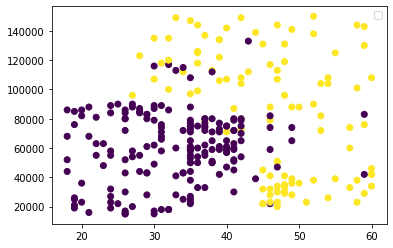

In [10]:
mtp.scatter(x_train[:, 0], x_train[:, 1], c=y_train)
mtp.legend()
mtp.show()

**Visualising the Test set results**

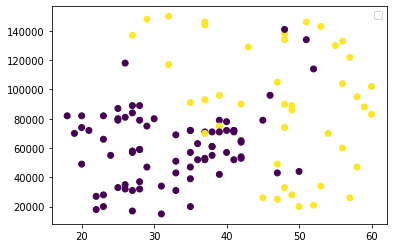

In [11]:
mtp.scatter(x_test[:, 0], x_test[:, 1], c=y_test)
mtp.legend()
mtp.show()


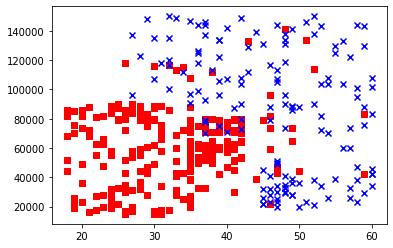

In [12]:
from matplotlib.colors import ListedColormap
markers = ('s', 'x', 'o')
colors = ('red', 'blue', 'lightgreen')
cmap = ListedColormap(colors[:len(nm.unique(y_test))])
for idx, cl in enumerate(nm.unique(y)):
    mtp.scatter(x=x[y == cl, 0], y=x[y == cl, 1],
               c=cmap(idx), marker=markers[idx], label=cl)